In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "/data/pcpe_01.csv"
df = pd.read_csv(path, delimiter=';')
df

,NUMERO_CASO,NUMERO_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,CPF_CNPJ_TITULAR,CNAB,CNAB=101,CNAB=119,CNAB=120,...,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,I-a,I-b,I-c,I-d,I-e,DIA_LANCAMENTO,MES_LANCAMENTO,ANO_LANCAMENTO
0,CASO-01-L1K4U4,O6Y,1965,153602,2,ZS9104223348,218,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017
1,CASO-01-L1K4U4,O6Y,1965,153602,2,ZS9104223348,218,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017
2,CASO-01-L1K4U4,L6X,742,810886,2,RJ3341718546,211,0,0,0,...,75,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
3,CASO-01-L1K4U4,L6X,742,810886,2,RJ3341718546,211,0,0,0,...,75,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
4,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138300,CASO-01-L1K4U4,O9A,490,296083,1,KO2307484082,206,0,0,0,...,490,296083.0,NaN,NaN,NaN,NaN,NaN,1,3,2021
138301,CASO-01-L1K4U4,O9A,490,296083,1,KO2307484082,102,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2021
138302,CASO-01-L1K4U4,O9A,490,296083,2,KO2307484082,102,0,0,0,...,490,296083.0,NaN,NaN,NaN,NaN,NaN,1,3,2021
138303,CASO-01-L1K4U4,O6Y,5776,191834,1,KO2307484082,205,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2021


In [5]:
# df_day = (df['DIA_LANCAMENTO'] >= 14) & (df['DIA_LANCAMENTO'] <= 28)
# df_month = (df['MES_LANCAMENTO'] == 3)
# df_year = (df['ANO_LANCAMENTO'] == 2019)

# df_period = df_day & df_month & df_year

tipology = ['I-a']

df_typology = df[tipology].notna().any(axis=1)

columns = [
    'NUMERO_BANCO',	
    'NUMERO_AGENCIA',	
    'NUMERO_CONTA',
    'CPF_CNPJ_TITULAR'
]

df_latex = df[df_typology].groupby(columns).agg({
    'I-a': 'count',
    'I-d': 'count'
    }
).groupby(columns).sum()

# print(df_latex.to_latex())




In [6]:
df.groupby('CPF_CNPJ_TITULAR').count()

,NUMERO_CASO,NUMERO_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,CNAB,CNAB=101,CNAB=119,CNAB=120,CNAB=123,...,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,I-a,I-b,I-c,I-d,I-e,DIA_LANCAMENTO,MES_LANCAMENTO,ANO_LANCAMENTO
CPF_CNPJ_TITULAR,,,,,,,,,,,,,,,,,,,,,
BJ4417257961,96,96,96,96,96,96,96,96,96,96,...,96,96,0,0,0,0,0,96,96,96
CH4383333866,781,781,781,781,781,781,781,781,781,781,...,781,393,0,0,0,0,0,781,781,781
DF1630316278,715,715,715,715,715,715,715,715,715,715,...,715,244,0,0,0,0,0,715,715,715
DL9366772175,697,697,697,697,697,697,697,697,697,697,...,697,220,0,0,0,0,0,697,697,697
DN2176597322,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,...,1626,796,248,0,0,0,0,1626,1626,1626
DQ0979579666,9315,9315,9315,9315,9315,9315,9315,9315,9315,9315,...,9315,4122,0,0,0,0,0,9315,9315,9315
EW3998046192,343,343,343,343,343,343,343,343,343,343,...,343,243,0,0,0,0,0,343,343,343
EW8537695146,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,...,1418,177,0,0,0,0,0,1418,1418,1418
FS0033571873,832,832,832,832,832,832,832,832,832,832,...,832,430,0,0,0,0,0,832,832,832


In [7]:
df[df['CPF_CNPJ_TITULAR'] == 'IK6356601049']

,NUMERO_CASO,NUMERO_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,CPF_CNPJ_TITULAR,CNAB,CNAB=101,CNAB=119,CNAB=120,...,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,I-a,I-b,I-c,I-d,I-e,DIA_LANCAMENTO,MES_LANCAMENTO,ANO_LANCAMENTO
4,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
5,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
6,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
7,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,201,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
8,CASO-01-L1K4U4,W5Y,554,902093,1,IK6356601049,101,1,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137623,CASO-01-L1K4U4,O9A,4951,764670,1,IK6356601049,209,0,0,0,...,4605,267089.0,NaN,NaN,NaN,NaN,NaN,23,2,2021
137624,CASO-01-L1K4U4,O9A,4951,764670,1,IK6356601049,209,0,0,0,...,4605,267089.0,NaN,NaN,NaN,NaN,NaN,23,2,2021
137959,CASO-01-L1K4U4,O9A,4951,764670,1,IK6356601049,213,0,0,0,...,4951,791378.0,NaN,NaN,NaN,NaN,NaN,26,2,2021
137960,CASO-01-L1K4U4,O9A,4951,764670,1,IK6356601049,102,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,26,2,2021


In [8]:
df['CNAB'].value_counts()

CNAB
213    24003
201    23420
117    13200
218    10994
105    10472
114    10095
209     8420
104     7459
120     6466
205     5028
112     4722
206     4498
102     2354
101     1775
106     1751
220      755
204      713
217      404
219      340
123      216
103      154
202      150
118      135
211      128
110      118
107      110
999       93
215       92
203       87
113       68
214       32
119       25
207       18
212        7
111        2
115        1
Name: count, dtype: int64

In [9]:
df['I-a'].value_counts()

I-a
1.0    11163
Name: count, dtype: int64

In [10]:
todas_colunas = df.columns
todas_colunas

Index(['NUMERO_CASO', 'NUMERO_BANCO', 'NUMERO_AGENCIA', 'NUMERO_CONTA', 'TIPO',
       'CPF_CNPJ_TITULAR', 'CNAB', 'CNAB=101', 'CNAB=119', 'CNAB=120',
       'CNAB=123', 'CNAB=201', 'CNAB=202', 'CNAB=203', 'CNAB=204', 'CNAB=205',
       'CNAB=206', 'CNAB=207', 'CNAB=209', 'CNAB=211', 'CNAB=212', 'CNAB=213',
       'CNAB=214', 'CNAB=215', 'CNAB=217', 'CNAB=218', 'CNAB=219', 'CNAB=220',
       'CNAB=999', 'DATA_LANCAMENTO', 'NUMERO_DOCUMENTO', 'VALOR_TRANSACAO',
       'NATUREZA_LANCAMENTO', 'VALOR_SALDO', 'NATUREZA_SALDO', 'CPF_CNPJ_OD',
       'NUMERO_BANCO_OD', 'NUMERO_AGENCIA_OD', 'NUMERO_CONTA_OD', 'I-a', 'I-b',
       'I-c', 'I-d', 'I-e', 'DIA_LANCAMENTO', 'MES_LANCAMENTO',
       'ANO_LANCAMENTO'],
      dtype='object')

In [11]:
column_Ia = df['I-a']
for i in column_Ia:
   print(i)


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [12]:
columns_num = [
    'DIA_LANCAMENTO', 
    'MES_LANCAMENTO',
    'VALOR_TRANSACAO',
    'VALOR_SALDO',
]

columns_cat = [
    'TIPO',
    'CNAB',
    'NATUREZA_SALDO'
]

target = ['I-a']
# X = df[columns]
y = df[target].values
y = np.nan_to_num(y)
y


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

encoder = OneHotEncoder()
scaler = MinMaxScaler()

X_onehot = encoder.fit_transform(df[columns_cat]).toarray() #tipo, cnab e natureza do saldo
X_num = scaler.fit_transform(df[columns_num])

X = np.column_stack([X_onehot, X_num])
X.shape

In [27]:
mid = 60000
X_train = X[0:mid]
y_train = y[0:mid]
X_test = X[mid:138305]
y_test = y[mid:138305]

In [28]:
import tensorflow as tf
sequence_length = 10
batch_size = 128

data_train = tf.keras.utils.timeseries_dataset_from_array(
    X_train[:-sequence_length],
    y_train[sequence_length:],
    sequence_length=sequence_length,
    sequence_stride=1,
    sampling_rate=1,
    batch_size=batch_size,
    shuffle=False,
    seed=None,
    start_index=None,
    end_index=None,
)

import tensorflow as tf
data_test = tf.keras.utils.timeseries_dataset_from_array(
    X_test[:-sequence_length],
    y_test[sequence_length:],
    sequence_length=sequence_length,
    sequence_stride=1,
    sampling_rate=1,
    batch_size=batch_size,
    shuffle=False,
    seed=None,
    start_index=None,
    end_index=None,
)

2024-04-25 21:08:06.992165: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 21:08:08.204481: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-25 21:08:08.204514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: a1c211f74e0b
2024-04-25 21:08:08.204519: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: a1c211f74e0b
2024-04-25 21:08:08.204642: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-04-25 21:08:08.204661: I

In [33]:
import keras
import keras.layers
import keras.optimizers.adam
import tensorflow as tf


model = keras.models.Sequential([
    # keras.layers.SimpleRNN(),
    # keras.layers.GRU(32, dropout=0.1, recurrent_dropout=.5,  input_shape=[None, X.shape[-1]]),
    # keras.layers.Conv1D(8, 6, input_shape=[None, X.shape[-1]]),
    keras.layers.LSTM(16,  return_sequences=True, input_shape=[None, X.shape[-1]]),
    # keras.layers.LSTM(16,  return_sequences=True),
    keras.layers.LSTM(16, return_sequences=True),
    # keras.layers.LSTM(32, dropout=0.1, recurrent_dropout=.1),
    # keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.build()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc', tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 16)          3968      
                                                                 
 lstm_3 (LSTM)               (None, None, 16)          2112      
                                                                 
 dense_1 (Dense)             (None, None, 1)           17        
                                                                 
Total params: 6,097
Trainable params: 6,097
Non-trainable params: 0
_________________________________________________________________


2024-04-25 21:09:19.955502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 21:09:19.956749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 21:09:19.957489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [34]:
history = model.fit(data_train, epochs=10)

Epoch 1/10


2024-04-25 21:09:21.416734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 21:09:21.418086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 21:09:21.418899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

InvalidArgumentError: Graph execution error:

Detected at node 'UnsortedSegmentSum_1' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/root/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/root/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/root/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/root/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/root/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/root/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/root/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/root/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/root/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/root/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/root/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/root/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/root/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/root/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/root/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/root/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/root/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_10081/537762301.py", line 1, in <module>
      history = model.fit(data_train, epochs=10)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/metrics/confusion_metrics.py", line 1485, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/metrics_utils.py", line 684, in update_confusion_matrix_variables
      return _update_confusion_matrix_variables_optimized(
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/metrics_utils.py", line 473, in _update_confusion_matrix_variables_optimized
      fp_bucket_v = tf.math.unsorted_segment_sum(
Node: 'UnsortedSegmentSum_1'
data.shape = [128] does not start with segment_ids.shape = [1280]
	 [[{{node UnsortedSegmentSum_1}}]] [Op:__inference_train_function_17836]

In [31]:
y_pred = model.predict(data_test)

2024-04-25 21:08:55.330476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2024-04-25 21:08:55.331133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [78286]
	 [[{{node Placeholder/_28}}]]
2024-04-25 21:08:55.526010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int

  1/612 [..............................] - ETA: 5:14

2024-04-25 21:08:55.641928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-25 21:08:55.643075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-25 21:08:55.643764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

612/612 [==============================] - 3s 4ms/step


In [54]:
np.quantile(y_pred, 0.95)

0.8258225619792938

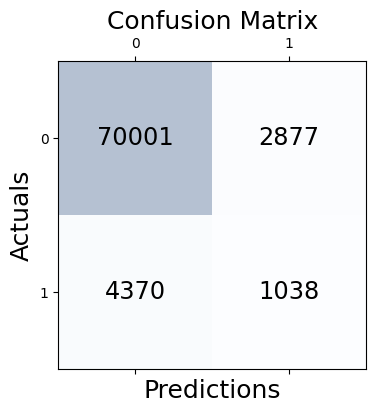

In [26]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test[sequence_length:-sequence_length+1], y_pred=y_pred > np.quantile(y_pred, 0.95))
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('../results/confusion_matrix.pdf')
plt.show()

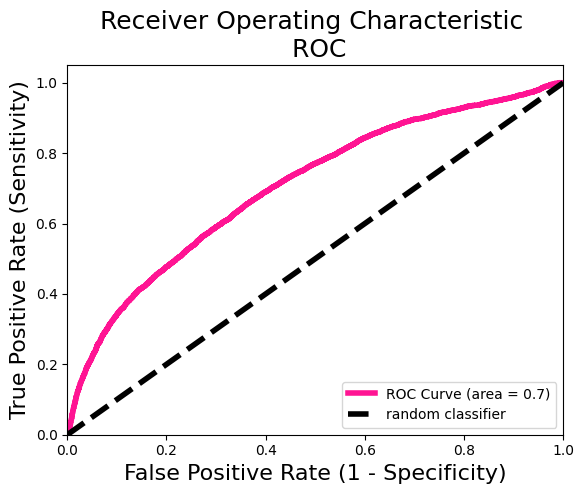

In [27]:
from sklearn import metrics
title = "ROC"
fpr, tpr, thresholds = metrics.roc_curve(y_test[sequence_length:-sequence_length+1], y_pred)
auc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='deeppink', linewidth=4, label=f"ROC Curve (area = {round(auc,2) })")
ax.plot([0,1], [0,1], "k--",linewidth=4, label='random classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate (1 - Specificity)", fontsize=16)
ax.set_ylabel("True Positive Rate (Sensitivity)", fontsize=16)
ax.set_title(f"Receiver Operating Characteristic \n {title}", fontsize=18)
ax.legend(loc="lower right")
plt.savefig("../results/roc.pdf")
plt.show()

In [28]:
df_test  = df[mid:138305][sequence_length:-sequence_length+1]
df_test.loc[:, 'PREDICTED'] = y_pred
df_test.to_csv('../results/all_data.csv')

In [29]:
columns = ['NUMERO_BANCO',	'NUMERO_AGENCIA','NUMERO_CONTA','TIPO','CPF_CNPJ_TITULAR', 'I-a', 'PREDICTED']
df_final = df_test[(df_test['CPF_CNPJ_TITULAR'] == 'MR3838274417') & (df_test['PREDICTED'] > np.quantile(y_pred, 0.95))][columns+columns_cat+columns_num]
df_final.to_csv("../results/account.csv")